In [2]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

'''# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook'''

'# Import our libraries\nimport librosa\nimport librosa.display\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.pyplot import specgram\nimport pandas as pd\nimport os\nimport IPython.display as ipd  # To play sound in the notebook'

In [3]:
RAV = "/content/drive/MyDrive/Ravdess/"


In [4]:
dir_list = os.listdir(RAV)
#dir_list[0:5]

#/content/drive/MyDrive/Ravdess/Actor_01

In [5]:
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_surprise     96
male_angry          96
male_disgust        96
female_angry        96
male_sad            96
male_surprise       96
female_happy        96
male_fear           96
female_disgust      96
male_happy          96
female_fear         96
female_sad          96
Name: labels, dtype: int64

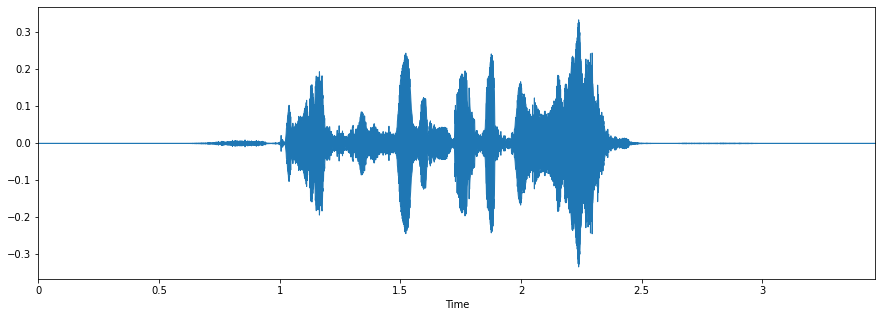

In [6]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

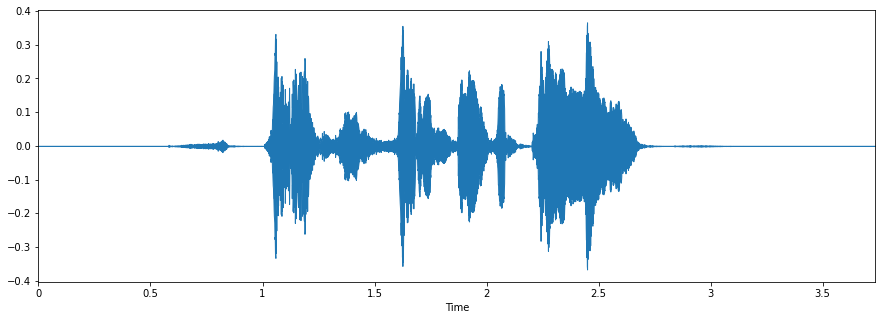

In [7]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

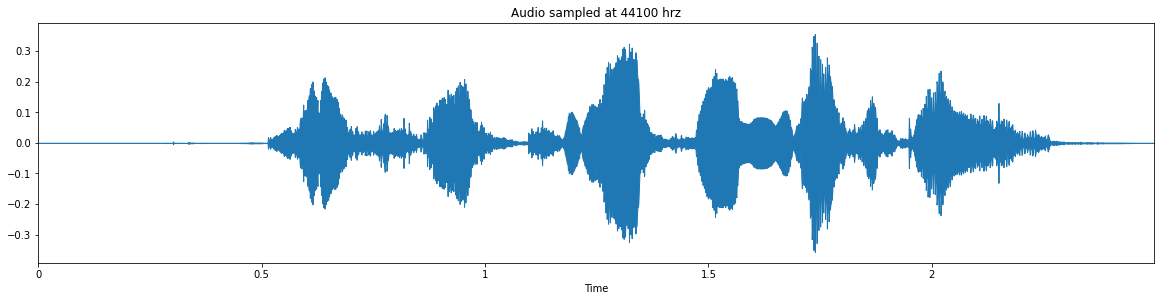

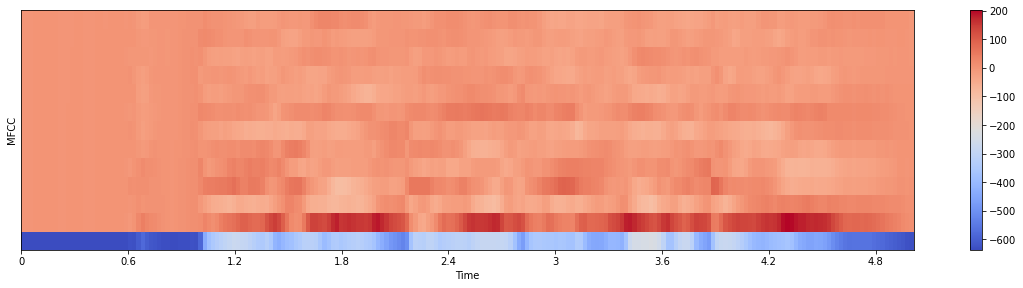

In [8]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/Ravdess/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

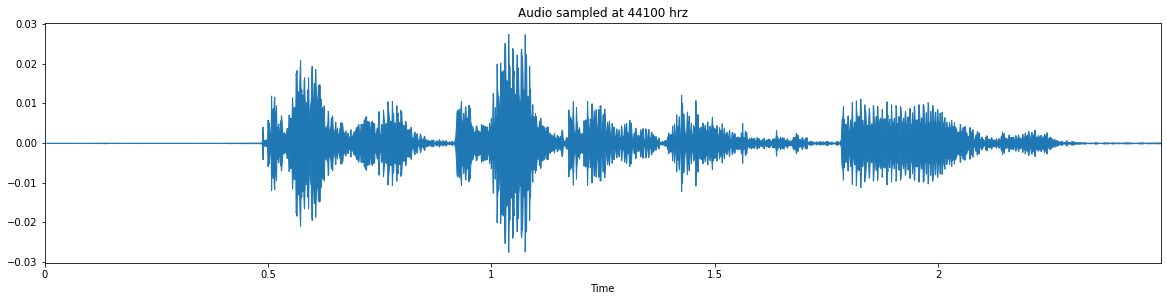

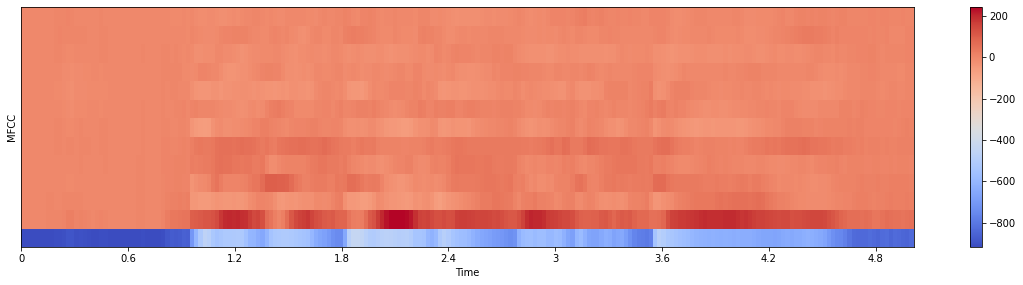

In [9]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/Ravdess/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

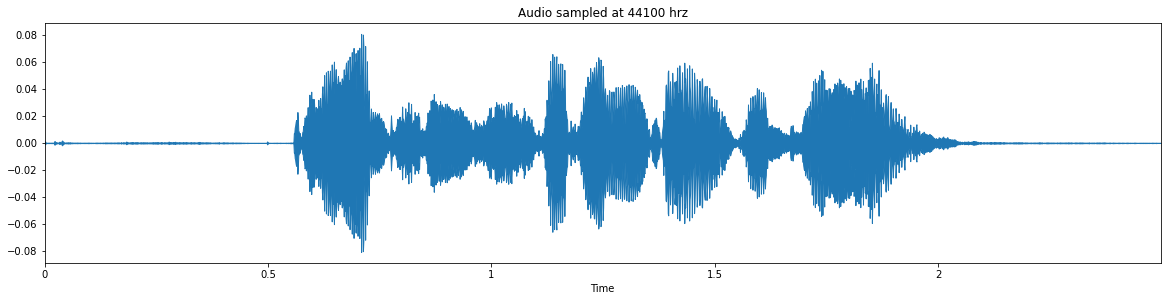

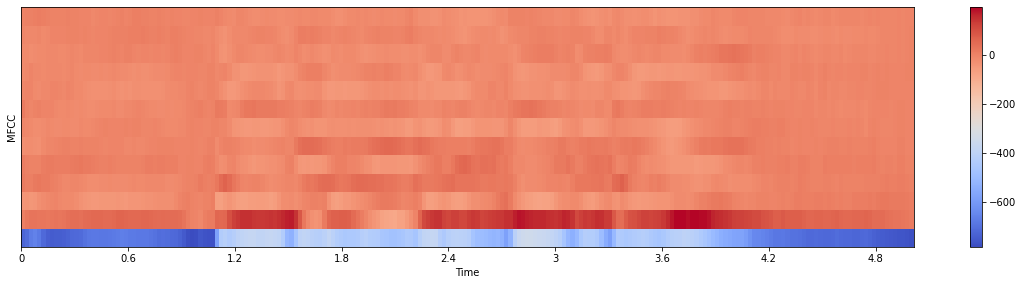

In [10]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "/content/drive/MyDrive/Ravdess/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


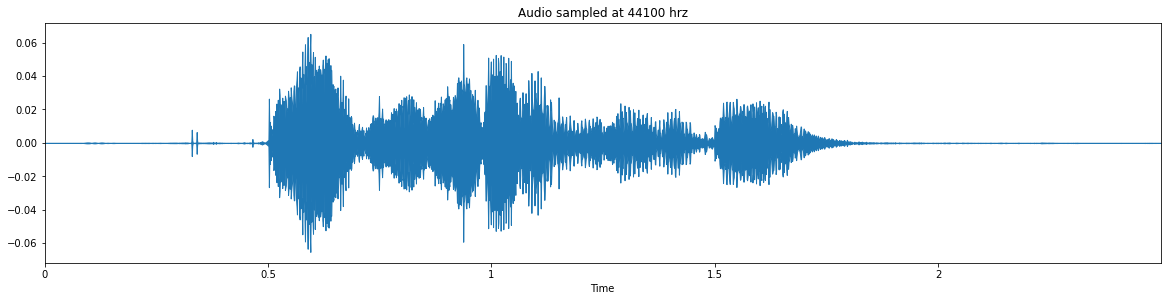

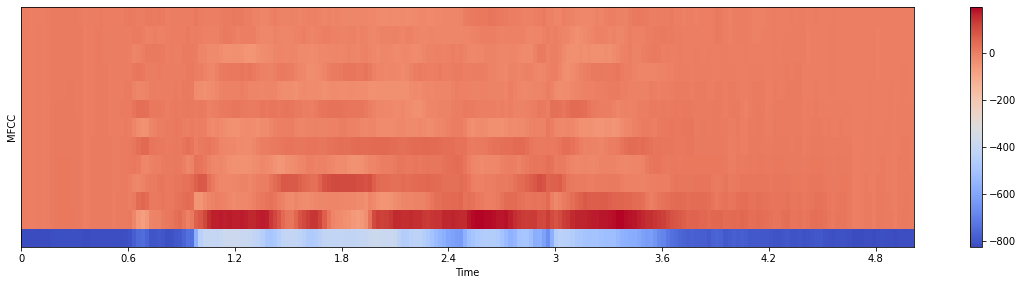

In [11]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "/content/drive/MyDrive/Ravdess/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


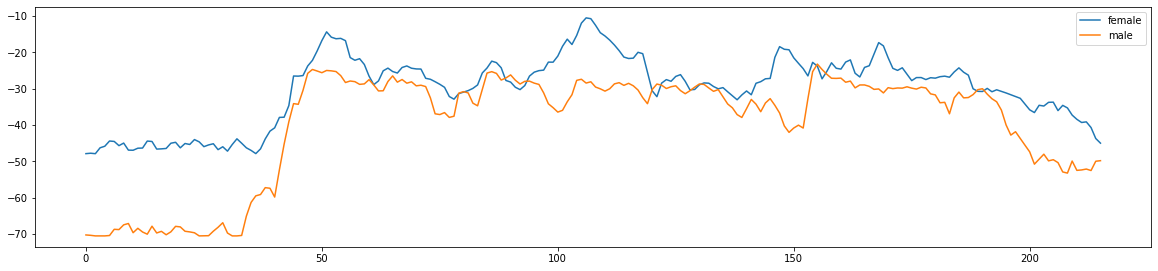

In [12]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/Ravdess/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/Ravdess/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


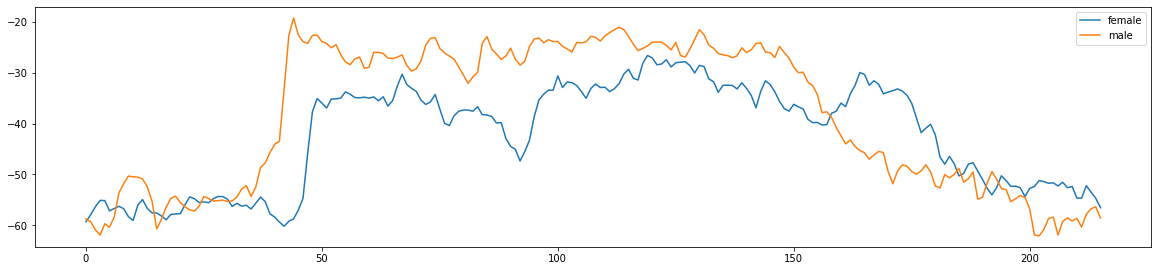

In [13]:
 #Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/content/drive/MyDrive/Ravdess/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/content/drive/MyDrive/Ravdess/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [14]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [15]:
df = pd.concat([RAV_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

male_neutral       144
female_neutral     144
female_surprise     96
male_angry          96
male_disgust        96
female_angry        96
male_sad            96
male_surprise       96
female_happy        96
male_fear           96
female_disgust      96
male_happy          96
female_fear         96
female_sad          96
Name: labels, dtype: int64


In [16]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

labels   source                                               path
0  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
1  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
2  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
3  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
4  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...

In [18]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1440


feature
0  [-67.55739, -67.55739, -67.55739, -67.55739, -...
1  [-61.84994, -62.89504, -63.830635, -60.552586,...
2  [-66.05848, -66.05848, -66.05848, -66.05848, -...
3  [-70.26777, -70.26777, -70.26777, -70.26777, -...
4  [-65.80097, -65.80097, -65.80097, -65.80097, -...

In [19]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels   source  ...        214        215
0  male_neutral  RAVDESS  ... -66.086418 -66.205048
1  male_neutral  RAVDESS  ... -65.389946 -65.389946
2  male_neutral  RAVDESS  ... -61.515789 -58.214882
3  male_neutral  RAVDESS  ... -61.082737 -60.234661
4  male_neutral  RAVDESS  ... -64.178665 -63.061893

[5 rows x 219 columns]

In [20]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1440, 219)


labels   source  ...        214        215
0  male_neutral  RAVDESS  ... -66.086418 -66.205048
1  male_neutral  RAVDESS  ... -65.389946 -65.389946
2  male_neutral  RAVDESS  ... -61.515789 -58.214882
3  male_neutral  RAVDESS  ... -61.082737 -60.234661
4  male_neutral  RAVDESS  ... -64.178665 -63.061893

[5 rows x 219 columns]

In [21]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2    ...        213        214        215
1050 -59.042679 -59.042679 -59.042679  ... -55.805397 -57.557350 -58.618046
1089 -58.408798 -57.676193 -57.588539  ... -52.894089 -54.338974 -54.939537
1272 -69.054497 -69.054497 -66.796432  ... -50.546280 -51.085041 -53.542881
1029 -68.502747 -68.502747 -68.502747  ... -68.502747 -68.336723 -68.385651
1336 -51.905518 -50.803440 -50.226070  ... -37.082386 -34.643002 -30.653564
328  -59.089886 -58.483887 -57.926979  ... -36.825523 -36.827148 -35.712086
318  -38.217403 -41.892891 -44.717838  ... -44.455662 -43.550034 -43.744911
1108 -37.782722 -37.787117 -38.029518  ... -22.871157  -6.644287   0.832262
1176 -69.967766 -69.967766 -69.967766  ... -59.495422 -60.098270 -63.159885
12   -68.049080 -68.049080 -68.049080  ... -68.049080 -68.049080 -68.049080

[10 rows x 216 columns]

In [22]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1080, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [23]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1)

In [24]:
# New model
import tensorflow as tf
from tensorflow.keras import optimizers
optimizers.RMSprop()



In [25]:
#opt = tensorflow.keras.optimizers.RMSprop()

model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
68/68 [==============================] - 9s 16ms/step - loss: 2.6660 - accuracy: 0.0960 - val_loss: 2.6375 - val_accuracy: 0.0500
Epoch 2/100
68/68 [==============================] - 1s 10ms/step - loss: 2.5237 - accuracy: 0.1656 - val_loss: 2.6044 - val_accuracy: 0.1222
Epoch 3/100
68/68 [==============================] - 1s 10ms/step - loss: 2.4463 - accuracy: 0.2218 - val_loss: 2.5502 - val_accuracy: 0.1556
Epoch 4/100
68/68 [==============================] - 1s 10ms/step - loss: 2.3887 - accuracy: 0.2375 - val_loss: 2.4887 - val_accuracy: 0.1861
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 2.3055 - accuracy: 0.2545 - val_loss: 2.4157 - val_accuracy: 0.2194
Epoch 6/100
68/68 [==============================] - 1s 10ms/step - loss: 2.2648 - accuracy: 0.2698 - val_loss: 2.3666 - val_accuracy: 0.2639
Epoch 7/100
68/68 [==============================] - 1s 10ms/step - loss: 2.1817 - accuracy: 0.3132 - val_loss: 2.3182 - val_accuracy: 0.2722
Epoch 

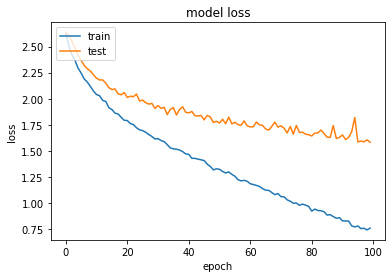

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model.h5 


In [51]:
import tensorflow as tf
from tensorflow.keras import optimizers
optimizers.RMSprop()

In [52]:
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)


In [55]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 45.00%


In [56]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

23/23 [==============================] - 0s 4ms/step


array([13, 11,  5,  3, 13, 11,  4,  1,  6,  8,  0,  6, 11,  2, 11,  4,  2,
       13,  5,  5,  6,  4,  4, 11,  2, 11, 13,  8, 13,  7,  9,  9,  7,  7,
       11, 10, 10, 11,  4, 10,  4, 11,  3, 10, 10,  8,  1, 11,  2,  4, 11,
        2, 10,  5,  5,  1,  4,  6, 10, 11, 13,  1, 13,  1,  1,  5,  5,  7,
        1,  8,  2,  4,  4,  5,  8, 11,  7,  4,  7,  1, 11,  3,  9, 11,  4,
        7,  2,  4,  8,  5,  4, 12,  1,  1,  3, 11,  8, 11,  2, 10,  4,  2,
        7, 11, 10,  6,  3,  1,  8, 11,  6,  2,  2, 10,  2,  4,  1,  8,  9,
        9,  6,  5,  3,  0,  7, 11,  4,  3,  2,  2, 11, 13, 13, 13,  6,  8,
        5,  8,  6,  2, 13,  3,  2,  6,  1,  7,  8, 11,  9,  1,  9,  4,  4,
       13,  6, 11,  0,  8, 11,  6,  9, 11,  3,  2,  4,  4,  8,  6,  6,  6,
        4, 11,  6,  6, 10,  4,  1,  2,  1,  6,  5,  4,  4,  2,  4, 11,  6,
        1,  2, 10, 11,  3,  0,  4, 11, 10, 11,  6,  1,  4,  4, 10,  9,  5,
       10,  2,  7,  5, 10, 13,  3,  9,  6,  1, 12, 11,  0,  5,  1,  9,  3,
       13,  4,  2, 10,  5

In [57]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues  predictedvalues
170   female_neutral   female_neutral
171     male_disgust     male_neutral
172     female_angry  female_surprise
173  female_surprise  female_surprise
174     male_disgust       male_happy
175   female_neutral   female_neutral
176     male_disgust   female_disgust
177     male_disgust      female_fear
178         male_sad   female_disgust
179     female_angry  female_surprise

In [58]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()


actualvalues
predictedvalues              
female_angry               11
female_disgust             28
female_fear                31
female_happy               22
female_neutral             42
female_sad                 34
female_surprise            30
male_angry                 17
male_disgust               24
male_fear                  18
male_happy                 24
male_neutral               51
male_sad                    4
male_surprise              24

In [59]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.45


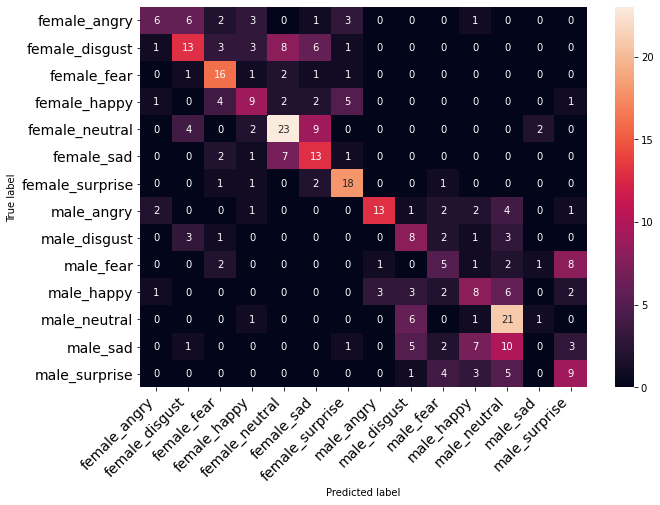

In [60]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [61]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.55      0.27      0.36        22
 female_disgust       0.46      0.37      0.41        35
    female_fear       0.52      0.73      0.60        22
   female_happy       0.41      0.38      0.39        24
 female_neutral       0.55      0.57      0.56        40
     female_sad       0.38      0.54      0.45        24
female_surprise       0.60      0.78      0.68        23
     male_angry       0.76      0.50      0.60        26
   male_disgust       0.33      0.44      0.38        18
      male_fear       0.28      0.25      0.26        20
     male_happy       0.33      0.32      0.33        25
   male_neutral       0.41      0.70      0.52        30
       male_sad       0.00      0.00      0.00        29
  male_surprise       0.38      0.41      0.39        22

       accuracy                           0.45       360
      macro avg       0.43      0.45      0.42       360
   weighted avg       0.43   

0.95


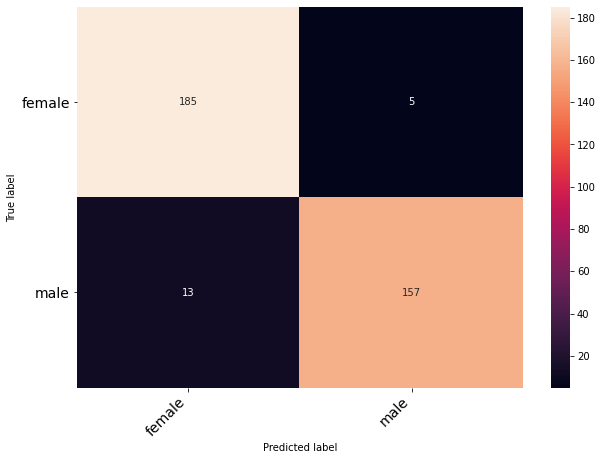

In [62]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [63]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.93      0.97      0.95       190
        male       0.97      0.92      0.95       170

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



0.46944444444444444


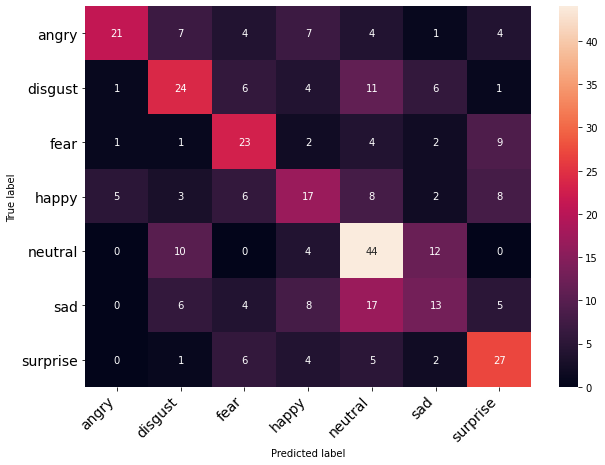

In [65]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [66]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.75      0.44      0.55        48
     disgust       0.46      0.45      0.46        53
        fear       0.47      0.55      0.51        42
       happy       0.37      0.35      0.36        49
     neutral       0.47      0.63      0.54        70
         sad       0.34      0.25      0.29        53
    surprise       0.50      0.60      0.55        45

    accuracy                           0.47       360
   macro avg       0.48      0.47      0.46       360
weighted avg       0.48      0.47      0.46       360



In [67]:
# Importing required libraries 
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
#!pip install pipwin
#!pipwin install pyaudio
!sudo apt-get install python-pyaudio


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 python-pyaudio
0 upgraded, 2 newly installed, 0 to remove and 17 not upgraded.
Need to get 88.6 kB of archives.
After this operation, 324 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pyaudio amd64 0.2.11-1build2 [24.1 kB]
Fetched 88.6 kB in 1s (172 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debco

In [ ]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "test audio\\testing.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

In [68]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/DC_a02.wav')
ipd.Audio('/content/drive/MyDrive/DC_a02.wav')

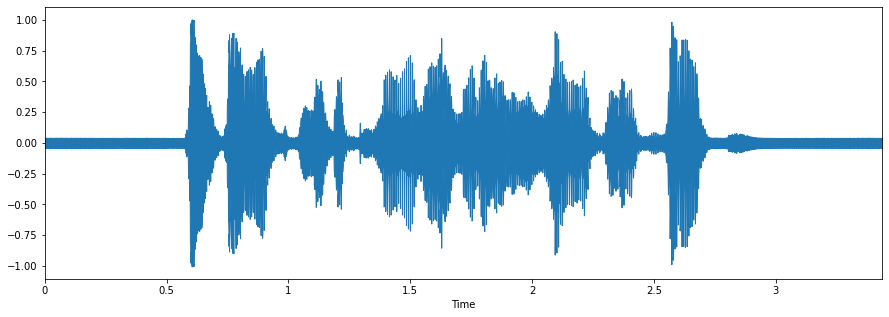

In [69]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [71]:
'''# loading json and model architecture 
#json_file = open('/content/drive/MyDrive/saved-models/model_json.json' 'r')
json_file = open('model_json.json' 'r')

#/content/model_json.json
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/saved-models/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])'''




# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#score = loaded_model.evaluate(X_test, y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [73]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load('/content/drive/MyDrive/DC_a02.wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0          1          2    ...        213        214        215
0 -24.449829 -22.465742 -22.928043  ... -24.342152 -24.530264 -25.457796

[1 rows x 216 columns]

In [74]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 220ms/step


array([[0.01935791, 0.02217778, 0.00461803, 0.01036465, 0.00570257,
        0.00975392, 0.02874103, 0.4146103 , 0.04892972, 0.20809846,
        0.13165936, 0.02035289, 0.05756576, 0.01806757]], dtype=float32)

In [76]:
filename = '/content/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['male_angry']


In [77]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
from tqdm import tqdm
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [78]:
#########################
# Augmentation methods
#########################
def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

####################################
# the confusion matrix heat map plot
####################################
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



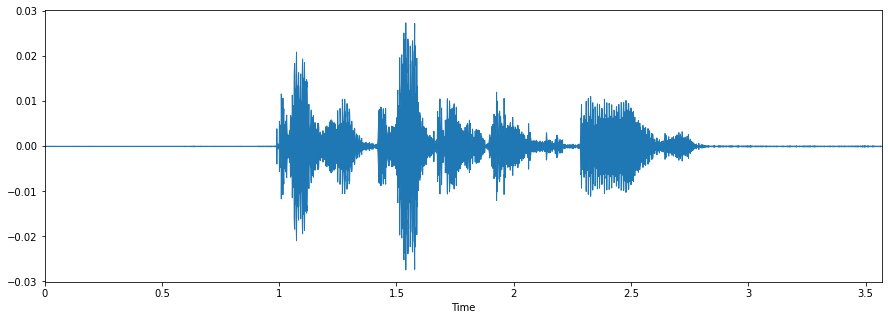

In [79]:
# Use one audio file in previous parts again
fname = '/content/drive/MyDrive/Ravdess/Actor_09/03-01-05-01-01-01-09.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

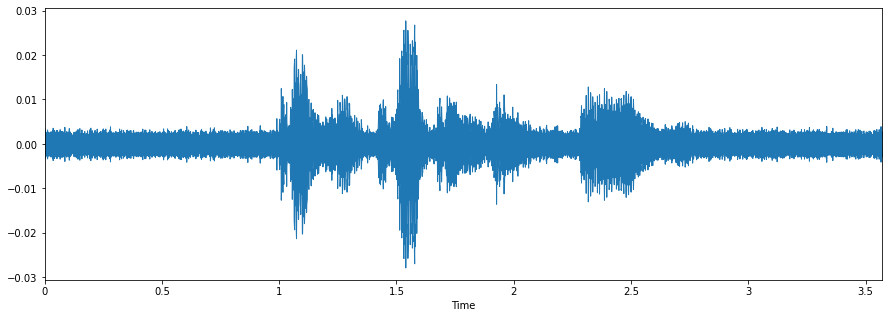

In [80]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

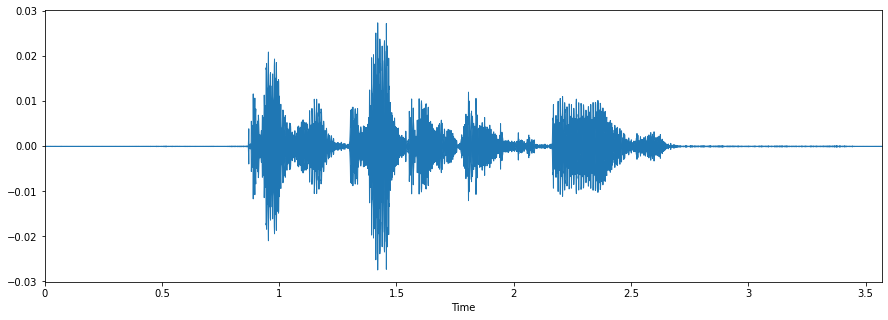

In [81]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

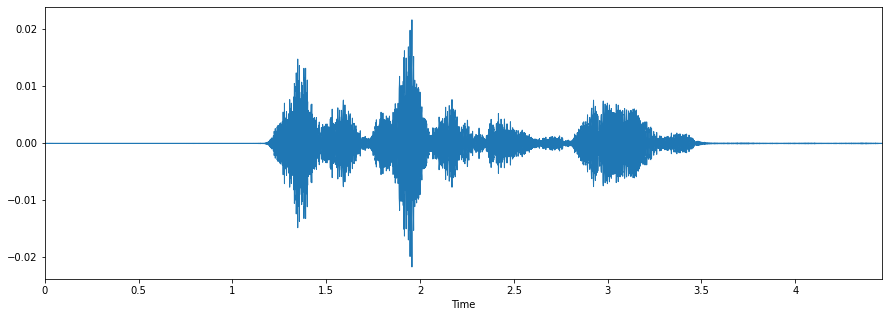

In [82]:
x = stretch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

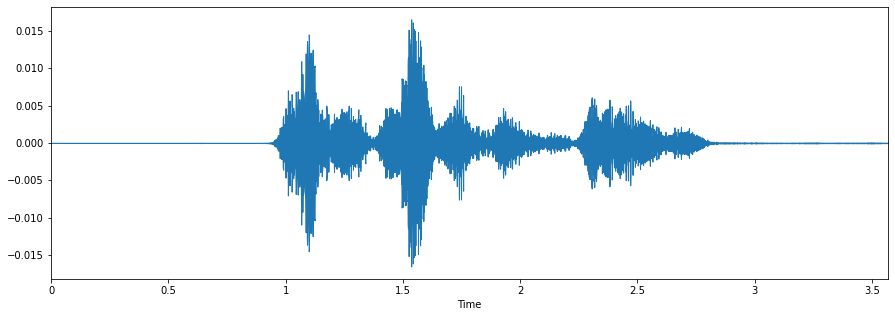

In [83]:
x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

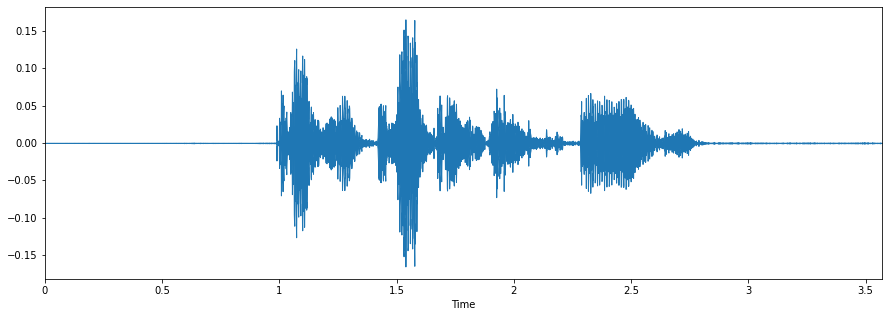

In [84]:
x = dyn_change(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)


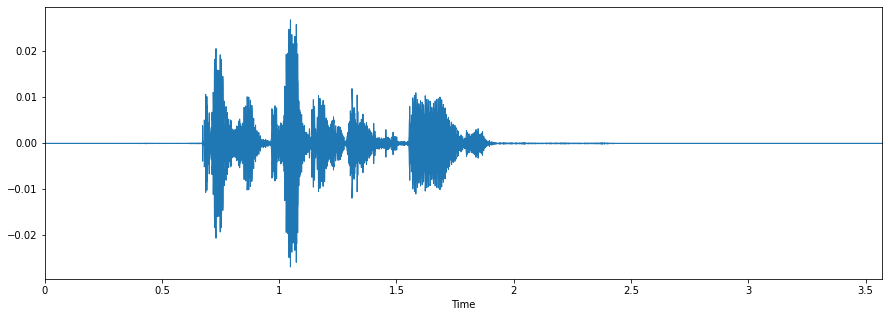

In [85]:
x = speedNpitch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

In [87]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/content/Data_path.csv")
ref.head()

labels   source                                               path
0  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
1  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
2  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
3  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...
4  male_neutral  RAVDESS  /content/drive/MyDrive/Ravdess/Actor_01/03-01-...

In [88]:
# Note this takes a couple of minutes (~16 mins) as we're iterating over 4 datasets, and with augmentation  
df = pd.DataFrame(columns=['feature'])
df_noise = pd.DataFrame(columns=['feature'])
df_speedpitch = pd.DataFrame(columns=['feature'])
cnt = 0

# loop feature extraction over the entire dataset
for i in tqdm(ref.path):
    
    # first load the audio 
    X, sample_rate = librosa.load(i
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )

    # take mfcc and mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=np.array(sample_rate), 
                                        n_mfcc=13),
                    axis=0)
    
    df.loc[cnt] = [mfccs]   

    # random shifting (omit for now)
    # Stretch
    # pitch (omit for now)
    # dyn change
    
    # noise 
    aug = noise(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_noise.loc[cnt] = [aug]

    # speed pitch
    aug = speedNpitch(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_speedpitch.loc[cnt] = [aug]   

    cnt += 1

df.head()

100%|██████████| 1440/1440 [02:45<00:00,  8.71it/s]


feature
0  [-67.55739, -67.55739, -67.55739, -67.55739, -...
1  [-61.84994, -62.89504, -63.830635, -60.552586,...
2  [-66.05848, -66.05848, -66.05848, -66.05848, -...
3  [-70.26777, -70.26777, -70.26777, -70.26777, -...
4  [-65.80097, -65.80097, -65.80097, -65.80097, -...

In [89]:
# combine 
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df_noise = pd.concat([ref,pd.DataFrame(df_noise['feature'].values.tolist())],axis=1)
df_speedpitch = pd.concat([ref,pd.DataFrame(df_speedpitch['feature'].values.tolist())],axis=1)
print(df.shape,df_noise.shape,df_speedpitch.shape)

(1440, 219) (1440, 219) (1440, 219)


In [90]:
df = pd.concat([df,df_noise,df_speedpitch],axis=0,sort=False)
df=df.fillna(0)
del df_noise, df_speedpitch

df.head()


labels   source  ...        214        215
0  male_neutral  RAVDESS  ... -66.086418 -66.205048
1  male_neutral  RAVDESS  ... -65.389946 -65.389946
2  male_neutral  RAVDESS  ... -61.515789 -58.214882
3  male_neutral  RAVDESS  ... -61.082737 -60.234661
4  male_neutral  RAVDESS  ... -64.178665 -63.061893

[5 rows x 219 columns]

In [91]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2    ...        213        214        215
0    -67.557388 -67.557388 -67.557388  ... -67.498711 -66.086418 -66.205048
451  -30.206524 -30.322860 -29.401459  ... -26.811818 -27.692978 -29.764446
1357 -64.504471 -66.158127 -66.351288  ... -66.351288 -66.351288 -66.351288
1199 -55.542277 -55.601321 -55.550121  ... -53.596965 -54.757199 -58.277027
280  -31.232468 -29.592297 -30.280822  ... -28.348400 -29.852243 -33.343731
859  -29.307878 -29.059932 -32.960396  ... -29.786000 -31.472613 -32.880931
247  -72.856514 -71.332153 -75.139420  ... -42.426517 -46.249592 -46.938637
1130 -45.500286 -45.741581 -46.168564  ... -49.941238 -49.941238 -49.941238
446  -42.977581 -41.657121 -40.981120  ... -42.138038 -40.477694 -40.072391
1025 -37.651468 -36.931176 -35.201556  ... -39.815789 -40.294108 -38.059923

[10 rows x 216 columns]

In [92]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2    ...       213       214       215
0    -1.369185 -1.386740 -1.387333  ... -1.327395 -1.220328 -1.197665
451   1.420508  1.358173  1.434705  ...  1.310430  1.203721  1.037583
1357 -1.141166 -1.283587 -1.298129  ... -1.253005 -1.237051 -1.206636
1199 -0.471790 -0.505344 -0.499267  ... -0.426113 -0.505034 -0.711364
280   1.343882  1.412030  1.369667  ...  1.210810  1.067391  0.818032
859   1.487627  1.451275  1.171484  ...  1.117607  0.965086  0.846420
247  -1.764971 -1.665014 -1.948105  ...  0.298093  0.032111 -0.015873
1130  0.278235  0.221511  0.194599  ... -0.189104 -0.200969 -0.200051
446   0.466653  0.522616  0.578266  ...  0.316796  0.396532  0.405299
1025  0.864454  0.871011  1.005726  ...  0.467353  0.408123  0.528743

[10 rows x 216 columns]

In [93]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(3240, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [94]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(3240, 216, 1)

In [96]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_18 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_19 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 27, 256)          

In [97]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_test, y_test),verbose=2)

Epoch 1/150
203/203 - 3s - loss: 2.5427 - accuracy: 0.1531 - val_loss: 2.6372 - val_accuracy: 0.1000
Epoch 2/150
203/203 - 2s - loss: 2.4097 - accuracy: 0.2157 - val_loss: 2.6057 - val_accuracy: 0.0944
Epoch 3/150
203/203 - 2s - loss: 2.3113 - accuracy: 0.2497 - val_loss: 2.4783 - val_accuracy: 0.2093
Epoch 4/150
203/203 - 2s - loss: 2.2241 - accuracy: 0.2568 - val_loss: 2.3630 - val_accuracy: 0.2389
Epoch 5/150
203/203 - 2s - loss: 2.1490 - accuracy: 0.2772 - val_loss: 2.2926 - val_accuracy: 0.2676
Epoch 6/150
203/203 - 2s - loss: 2.0775 - accuracy: 0.3056 - val_loss: 2.2322 - val_accuracy: 0.2870
Epoch 7/150
203/203 - 2s - loss: 2.0174 - accuracy: 0.3272 - val_loss: 2.1931 - val_accuracy: 0.3074
Epoch 8/150
203/203 - 2s - loss: 1.9671 - accuracy: 0.3349 - val_loss: 2.1418 - val_accuracy: 0.3306
Epoch 9/150
203/203 - 2s - loss: 1.9117 - accuracy: 0.3420 - val_loss: 2.0970 - val_accuracy: 0.3269
Epoch 10/150
203/203 - 2s - loss: 1.8694 - accuracy: 0.3602 - val_loss: 2.0733 - val_accura

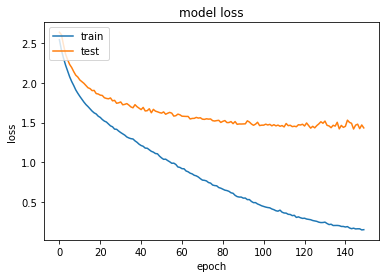

In [98]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
# Save model and weights
model_name = 'Emotion_Model_aug.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json_aug.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model_aug.h5 


In [101]:
# loading json and model architecture 
json_file = open('model_json_aug.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_aug.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 50.37%


In [102]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

68/68 [==============================] - 0s 4ms/step


array([ 3,  6, 10, ...,  3,  6,  7])

In [103]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170        male_sad       male_fear
171    female_happy    female_happy
172   male_surprise   male_surprise
173        male_sad  female_disgust
174        male_sad        male_sad
175   male_surprise   male_surprise
176       male_fear    male_neutral
177    male_disgust    male_disgust
178  female_neutral  female_neutral
179        male_sad        male_sad

In [104]:
# Write out the predictions to disk
finaldf.to_csv('Predictions_aug.csv', index=False)
finaldf.groupby('predictedvalues').count()


actualvalues
predictedvalues              
female_angry               59
female_disgust             54
female_fear                65
female_happy               91
female_neutral            134
female_sad                 69
female_surprise            93
male_angry                 55
male_disgust               56
male_fear                  66
male_happy                 79
male_neutral              123
male_sad                   58
male_surprise              78

0.45


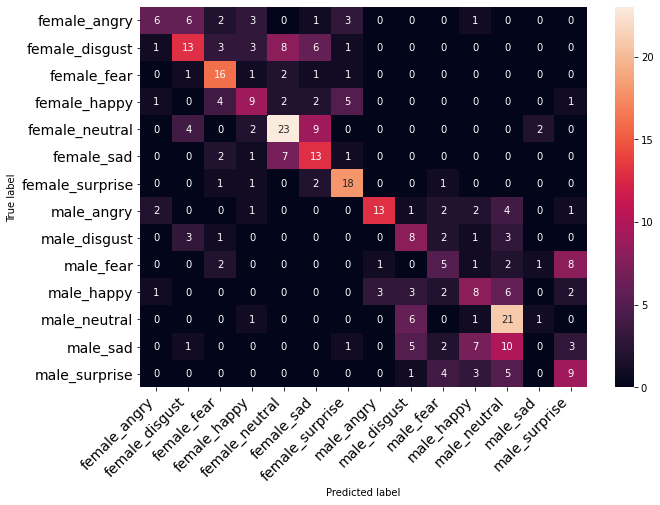

In [105]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [106]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))


                 precision    recall  f1-score   support

   female_angry       0.55      0.27      0.36        22
 female_disgust       0.46      0.37      0.41        35
    female_fear       0.52      0.73      0.60        22
   female_happy       0.41      0.38      0.39        24
 female_neutral       0.55      0.57      0.56        40
     female_sad       0.38      0.54      0.45        24
female_surprise       0.60      0.78      0.68        23
     male_angry       0.76      0.50      0.60        26
   male_disgust       0.33      0.44      0.38        18
      male_fear       0.28      0.25      0.26        20
     male_happy       0.33      0.32      0.33        25
   male_neutral       0.41      0.70      0.52        30
       male_sad       0.00      0.00      0.00        29
  male_surprise       0.38      0.41      0.39        22

       accuracy                           0.45       360
      macro avg       0.43      0.45      0.42       360
   weighted avg       0.43   

0.95


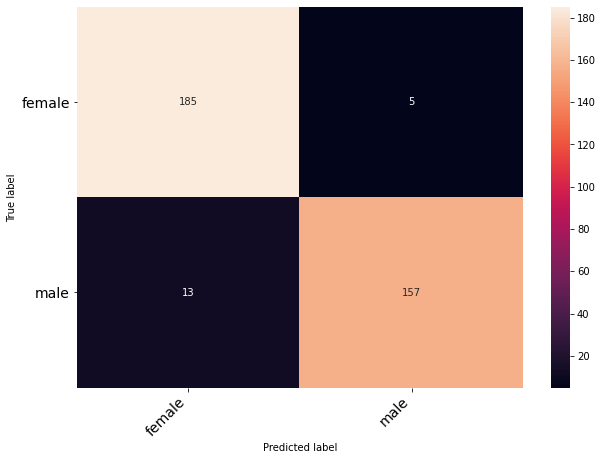

In [107]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)


In [108]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.93      0.97      0.95       190
        male       0.97      0.92      0.95       170

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



0.46944444444444444


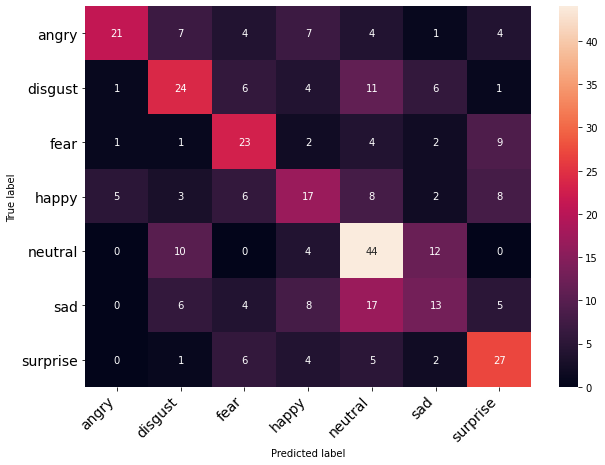

In [109]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [110]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.75      0.44      0.55        48
     disgust       0.46      0.45      0.46        53
        fear       0.47      0.55      0.51        42
       happy       0.37      0.35      0.36        49
     neutral       0.47      0.63      0.54        70
         sad       0.34      0.25      0.29        53
    surprise       0.50      0.60      0.55        45

    accuracy                           0.47       360
   macro avg       0.48      0.47      0.46       360
weighted avg       0.48      0.47      0.46       360

